# DIEGO ZILLI RUIZ - DSD TURMA 767

# Módulo de estatística 

## Projeto A - Análise do dataset "Wine Quality"

### Instruções

- O projeto deverá ser entregue até dia 22/11 antes do início da aula
- O projeto poderá ser feito em grupo com até 4 integrantes
- Serão 2 projetos A e B porém apenas 1 projeto deverá ser entregue e escolhido pelo grupo

- A entrega deve ser feita em jupyter notebook com os códigos explícitos e comentados. Além disso os conceitos, decisões e conclusões usadas devem estar destacadas no notebook
- A entrega pode ser feita pelo class ou no repositório do git de algum dos alunos
- Bom projeto

### Informações sobre o projeto

Dataset (conjunto de dados a ser utilizado) está disponível em:
    https://archive.ics.uci.edu/ml/datasets/Wine+Quality
    
Obs.: juntar os arquivos de vinho branco e tinto em um único dataframe

Data Set Information:

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult: [Web Link] or the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.


Attribute Information:

Input variables (based on physicochemical tests): <br>
- 1 - fixed acidity
- 2 - volatile acidity
- 3 - citric acid
- 4 - residual sugar
- 5 - chlorides
- 6 - free sulfur dioxide
- 7 - total sulfur dioxide
- 8 - density
- 9 - pH
- 10 - sulphates
- 11 - alcohol

Output variable (based on sensory data): <br>
- 12 - quality (score between 0 and 10)

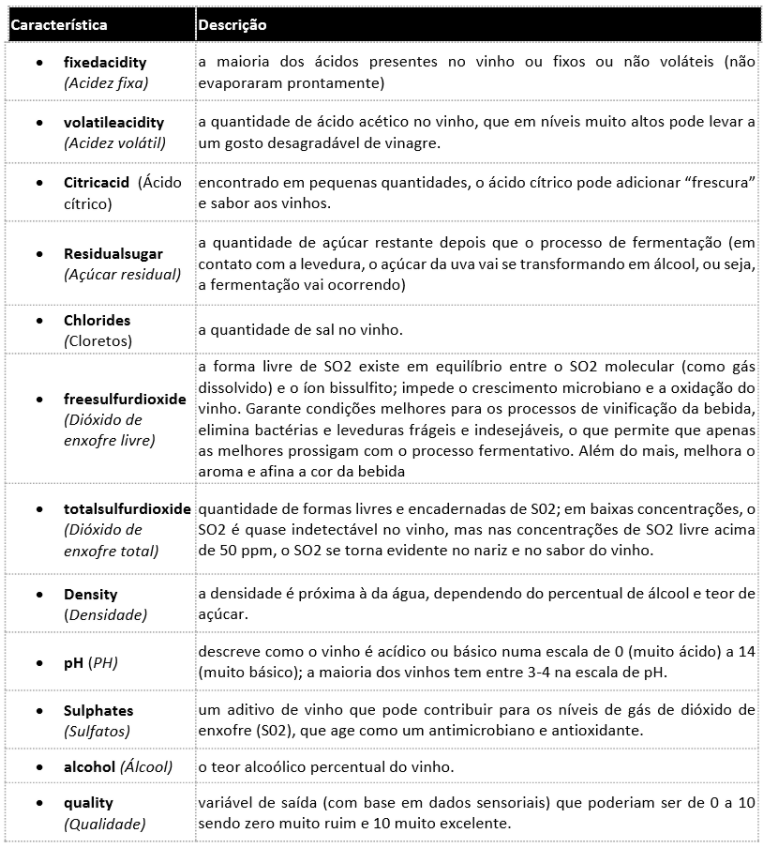

### Etapa 1

**EDA - Análise exploratória de dados**

- Análise das medidas de medidas de posição, dispersão, correlação (análises univaridas e bivariadas) - histograma, boxplot, mapa de calor, etc...
- Exclusão de outliers, caso necessário (sempre explicando a opção)



### Etapa 2

**Regressão Linear**

- Faça um algoritmo que estime a variável “Quality” em função das características físico-químicas dos vinhos
- Colocar comentários sobre a técnica utilizada e análise sobre as variáveis utilizadas, além dos seus respectivos “achados”. Faça uma interpretação do resultado

### Etapa 3

**Regressão logística**

- Sabendo que os vinhos com notas >= 6 são considerados vinhos de boa qualidade faça um algoritmo que classifique os vinhos em “Bom” ou “Ruim” em função de suas características físico-químicas;
- Colocar comentários sobre a técnica utilizada e análise sobre as variáveis utilizadas, além dos seus respectivos “achados”. Faça uma interpretação do resultado

# Resolução

In [125]:
# Imports utilizados em todos os exercícios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from scipy import stats




# Import da biblioteca warnings para ignorar eventuais warnings
import warnings
warnings.filterwarnings('ignore')

In [56]:
red = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

In [57]:
red['red wine'] = 1
white['red wine'] = 0

In [58]:
df = pd.concat([red, white])

# **Etapa 1 - EDA**

In [59]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [60]:
# Corrigindo o index
df.reset_index(drop=True, inplace=True)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [61]:
df.shape

(6497, 13)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  red wine              6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [63]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red wine
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [64]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
red wine                0
dtype: int64

- Todos os dados são numericos e não existem valores nulos nas colunas, portanto, não é necessário preencher valores nulos.

In [65]:
df['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

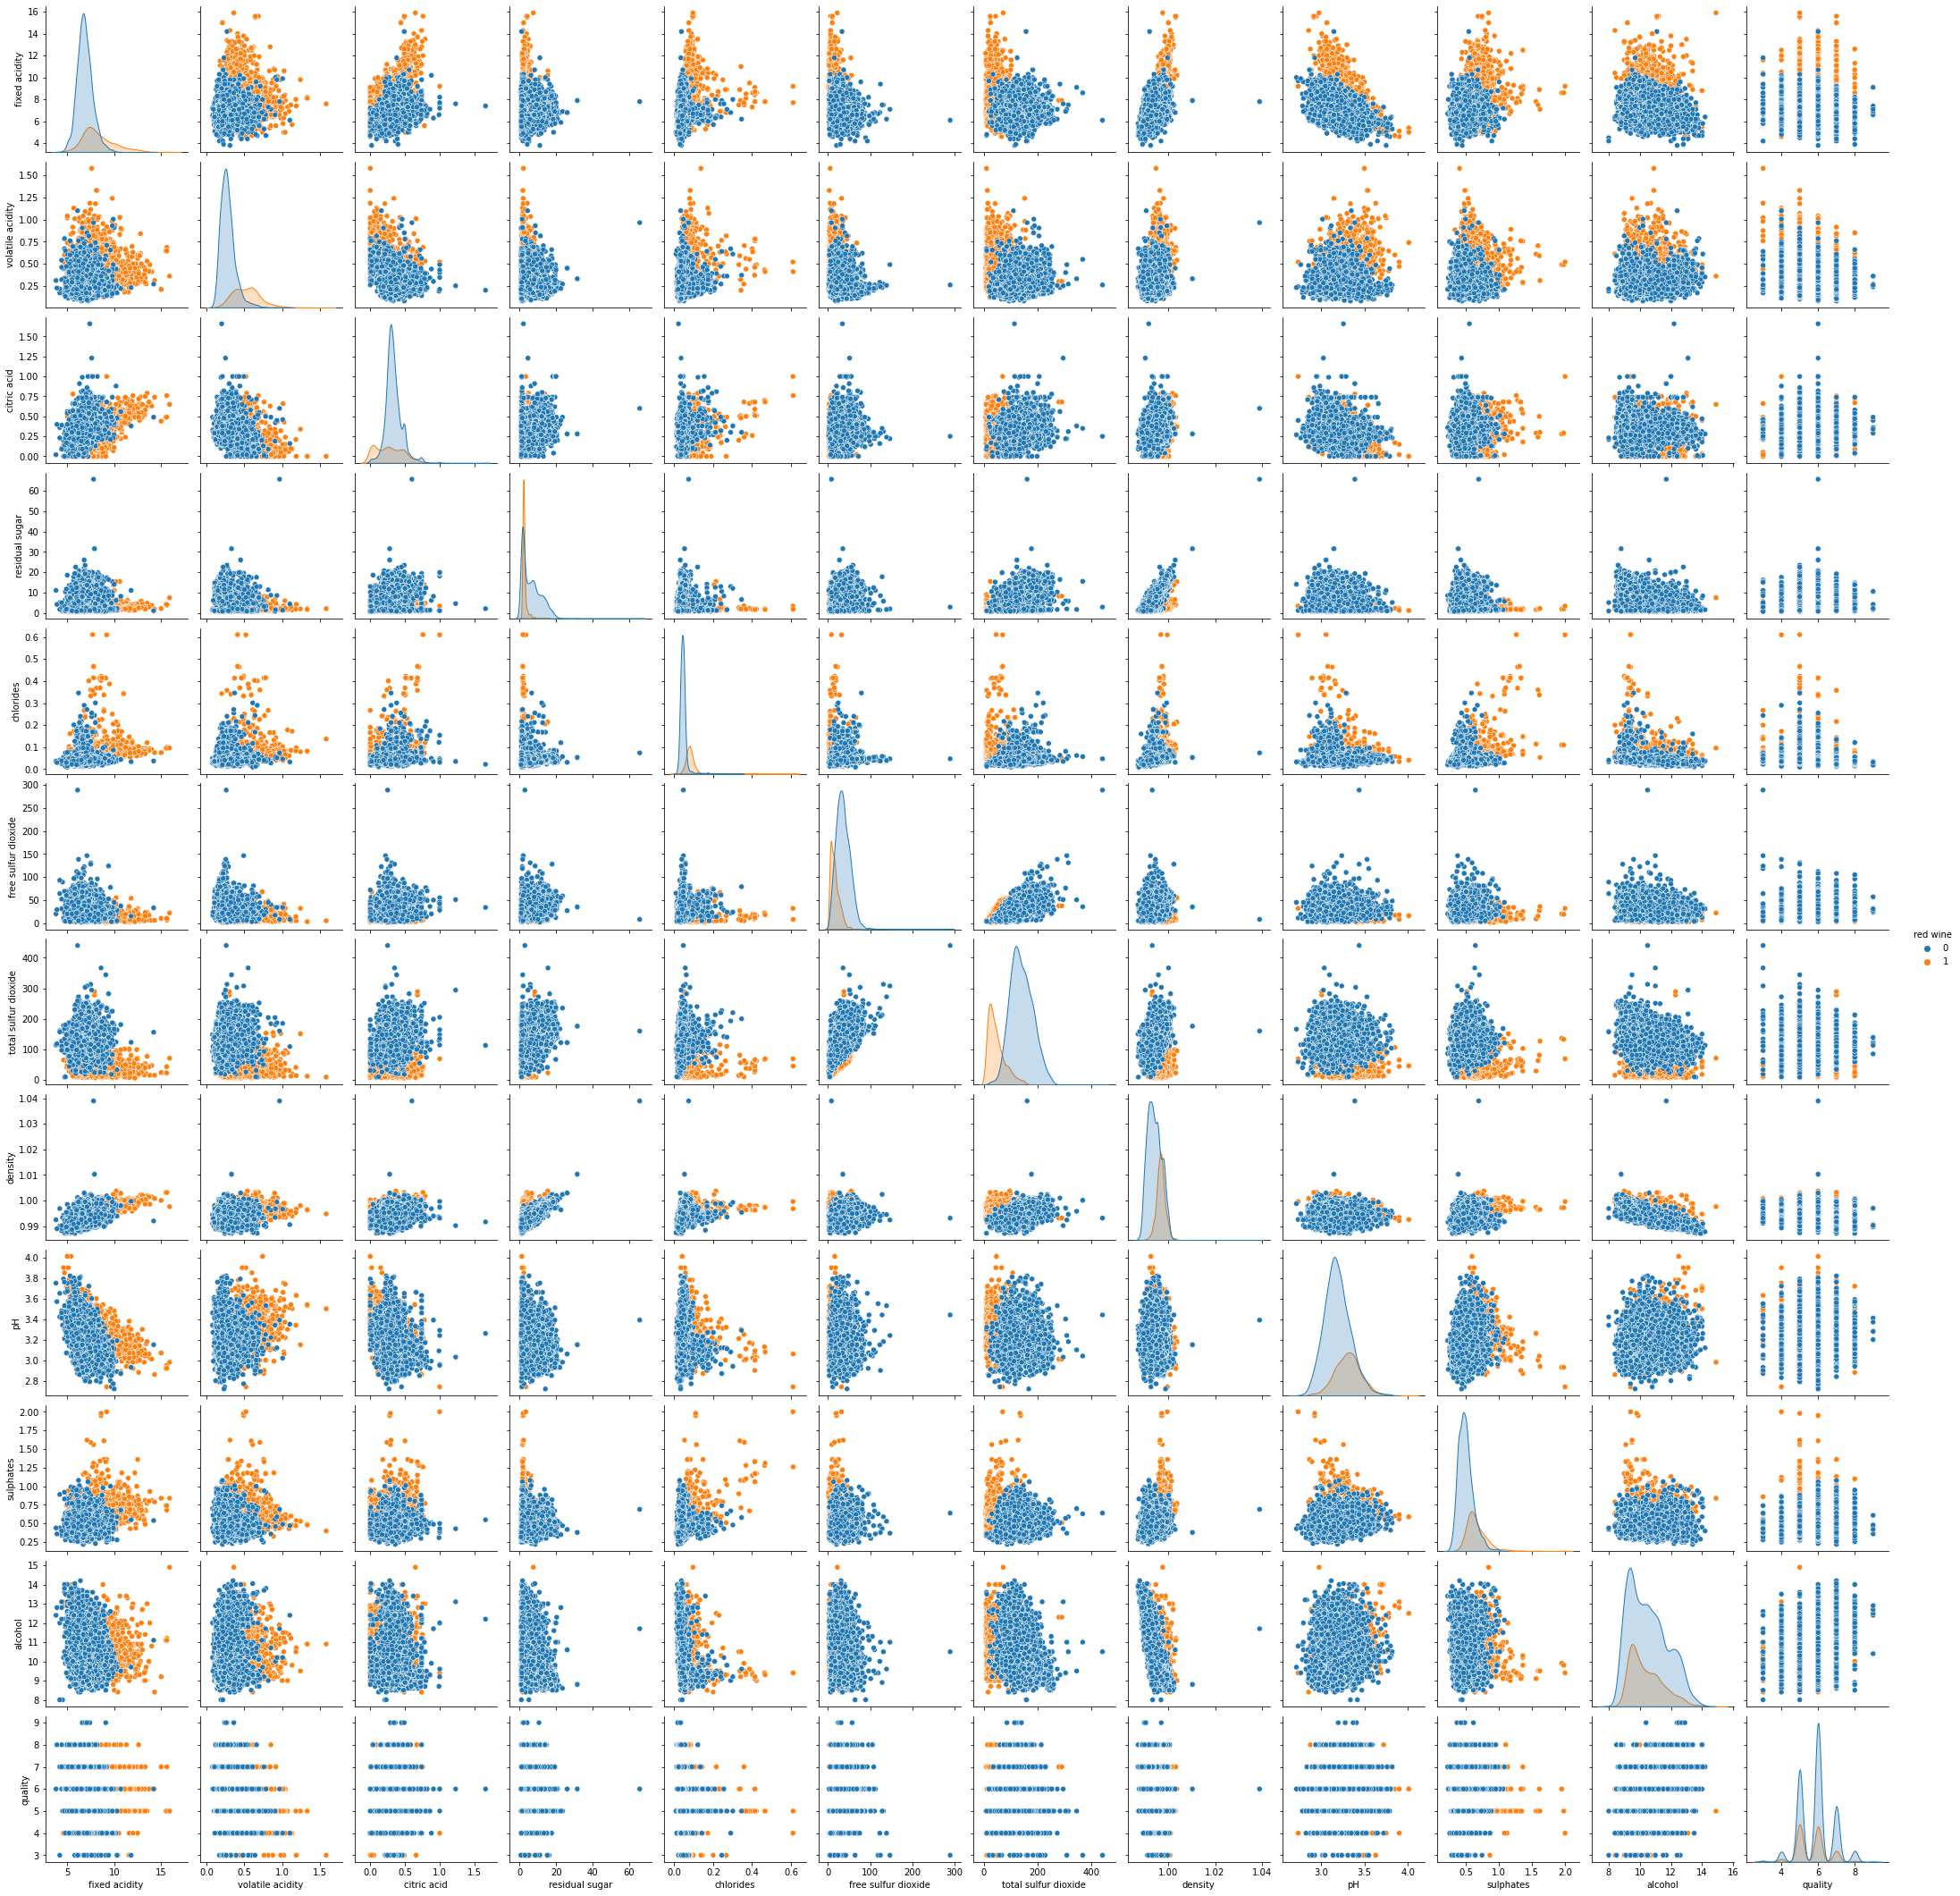

In [66]:
# Plot do pairplot
sns.pairplot(df, hue='red wine')

# Mostra o gráfico
plt.show()

In [67]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'red wine'],
      dtype='object')

**Verificando as caracteristicas fisico-químicas dos vinhos**

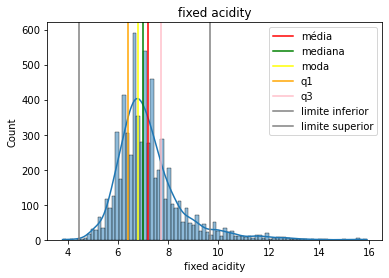

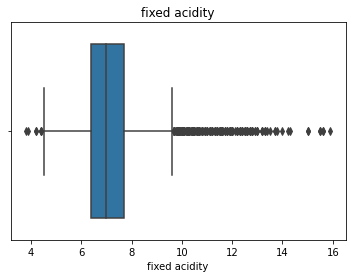

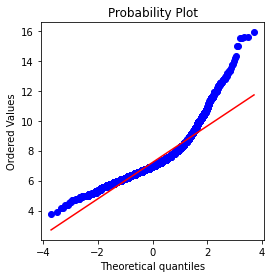

In [68]:
#Verificando dados de fixed acidity

item = 'fixed acidity'

sns.histplot(df[item], kde=True)
# plotando média
plt.axvline(x=df[item].mean(), color="red", label="média")

# plotando a mediana
plt.axvline(df[item].median(), color="green", label="mediana")

# Loop para plotar as modas
for i in range(df[item].mode().shape[0]):
    plt.axvline(df[item].mode()[i], color="yellow", label="moda")

plt.axvline(df[item].quantile(0.25), color="orange", label="q1")
plt.axvline(df[item].quantile(0.75), color="pink", label="q3")

IQR = df[item].quantile(0.75) - df[item].quantile(0.25)
plt.axvline(df[item].quantile(0.25)-1.5 * IQR, color="grey", label="limite inferior")
plt.axvline(df[item].quantile(0.75)+1.5 * IQR, color="grey", label="limite superior")

plt.legend()

plt.title(item)
plt.show()
plt.title(item)
sns.boxplot(df[item])
plt.show()
    

fig, ax = plt.subplots(figsize=(4, 4))

stats.probplot(df[item], plot=ax)
plt.show()

In [69]:
df[df['fixed acidity'] > 15]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red wine
442,15.6,0.685,0.76,3.7,0.100,6.0,43.0,1.00320,2.95,0.68,11.2,7,1
554,15.5,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5,1
555,15.5,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5,1
557,15.6,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5,1
652,15.9,0.360,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.9,5,1


Os outliers dos dados de 'fixed acidity' não parececem distorcer as correlações da amostra e não serão removidos.

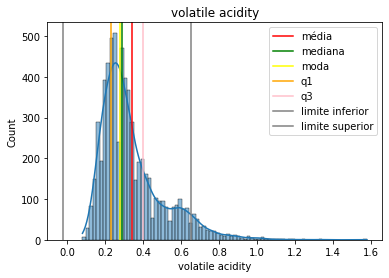

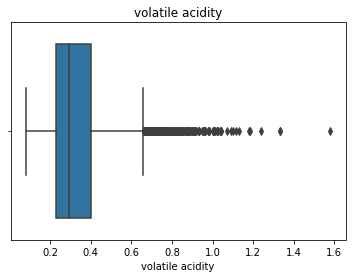

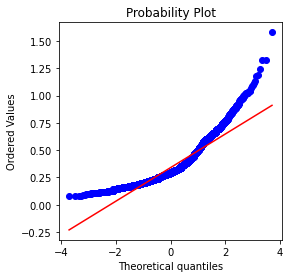

In [70]:
#Verificando dados de volatile acidity

item = 'volatile acidity'

sns.histplot(df[item], kde=True)
# plotando média
plt.axvline(x=df[item].mean(), color="red", label="média")

# plotando a mediana
plt.axvline(df[item].median(), color="green", label="mediana")

# Loop para plotar as modas
for i in range(df[item].mode().shape[0]):
    plt.axvline(df[item].mode()[i], color="yellow", label="moda")

plt.axvline(df[item].quantile(0.25), color="orange", label="q1")
plt.axvline(df[item].quantile(0.75), color="pink", label="q3")

IQR = df[item].quantile(0.75) - df[item].quantile(0.25)
plt.axvline(df[item].quantile(0.25)-1.5 * IQR, color="grey", label="limite inferior")
plt.axvline(df[item].quantile(0.75)+1.5 * IQR, color="grey", label="limite superior")

plt.legend()

plt.title(item)
plt.show()
plt.title(item)
sns.boxplot(df[item])
plt.show()
    

fig, ax = plt.subplots(figsize=(4, 4))

stats.probplot(df[item], plot=ax)
plt.show()

In [71]:
df[df['volatile acidity'] > 1.4]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red wine
1299,7.6,1.58,0.0,2.1,0.137,5.0,9.0,0.99476,3.5,0.4,10.9,3,1


**volatile acidity**

Optei por remover valores maiores do que 1.4 por ser um outlier isolado e não representar um vinho de qualidade boa ('quality > 6).

Todas as operações de tratamento do DF serão após verificar todos as caracteristicas do vinho o DF completo, ou seja, as condições serão aplicadas depois de verificar os dados da última coluna.

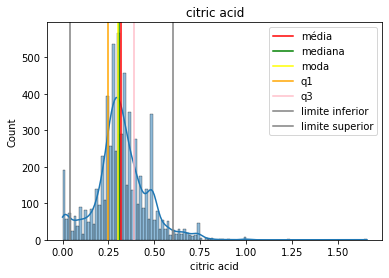

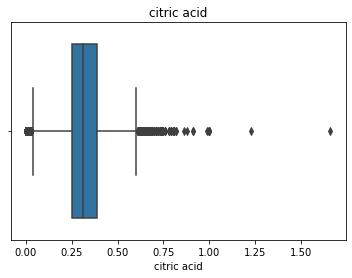

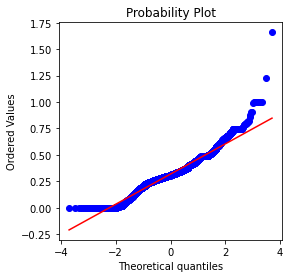

In [72]:
#Verificando dados de 'citric acid'

item = 'citric acid'

sns.histplot(df[item], kde=True)
# plotando média
plt.axvline(x=df[item].mean(), color="red", label="média")

# plotando a mediana
plt.axvline(df[item].median(), color="green", label="mediana")

# Loop para plotar as modas
for i in range(df[item].mode().shape[0]):
    plt.axvline(df[item].mode()[i], color="yellow", label="moda")

plt.axvline(df[item].quantile(0.25), color="orange", label="q1")
plt.axvline(df[item].quantile(0.75), color="pink", label="q3")

IQR = df[item].quantile(0.75) - df[item].quantile(0.25)
plt.axvline(df[item].quantile(0.25)-1.5 * IQR, color="grey", label="limite inferior")
plt.axvline(df[item].quantile(0.75)+1.5 * IQR, color="grey", label="limite superior")

plt.legend()

plt.title(item)
plt.show()
plt.title(item)
sns.boxplot(df[item])
plt.show()
    

fig, ax = plt.subplots(figsize=(4, 4))

stats.probplot(df[item], plot=ax)
plt.show()

In [73]:
df[df['citric acid'] > 1.2]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red wine
2344,7.4,0.20,1.66,2.1,0.022,34.0,113.0,0.99165,3.26,0.55,12.2,6,0
4751,7.6,0.25,1.23,4.6,0.035,51.0,294.0,0.99018,3.03,0.43,13.1,6,0


**citric acid**

Optei por remover valores maiores do que 1.2 por ser um outlier que não representar um vinho de qualidade boa ('quality > 6).

Todas as operações de tratamento do DF serão após verificar todos as caracteristicas do vinho o DF completo, ou seja, as condições serão aplicadas depois de verificar os dados da última coluna.

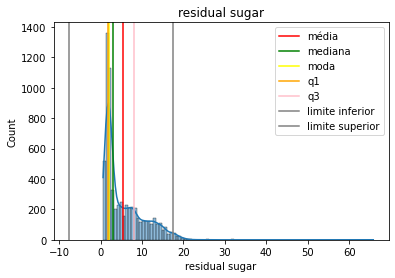

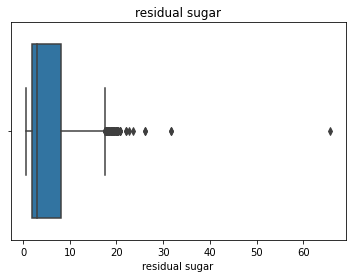

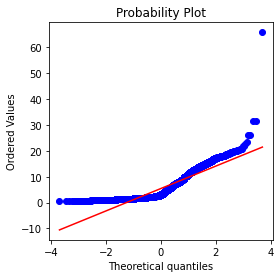

In [74]:
#Verificando dados de 'residual sugar'

item = 'residual sugar'

sns.histplot(df[item], kde=True)
# plotando média
plt.axvline(x=df[item].mean(), color="red", label="média")

# plotando a mediana
plt.axvline(df[item].median(), color="green", label="mediana")

# Loop para plotar as modas
for i in range(df[item].mode().shape[0]):
    plt.axvline(df[item].mode()[i], color="yellow", label="moda")

plt.axvline(df[item].quantile(0.25), color="orange", label="q1")
plt.axvline(df[item].quantile(0.75), color="pink", label="q3")

IQR = df[item].quantile(0.75) - df[item].quantile(0.25)
plt.axvline(df[item].quantile(0.25)-1.5 * IQR, color="grey", label="limite inferior")
plt.axvline(df[item].quantile(0.75)+1.5 * IQR, color="grey", label="limite superior")

plt.legend()

plt.title(item)
plt.show()
plt.title(item)
sns.boxplot(df[item])
plt.show()
    

fig, ax = plt.subplots(figsize=(4, 4))

stats.probplot(df[item], plot=ax)
plt.show()

In [75]:
df[df['residual sugar'] > 30]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red wine
3252,7.9,0.330,0.28,31.6,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6,0
3262,7.9,0.330,0.28,31.6,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6,0
4380,7.8,0.965,0.60,65.8,0.074,8.0,160.0,1.03898,3.39,0.69,11.7,6,0


**residual sugar**

Optei por remover valores maiores do que 30 por ser um outlier que não representar um vinho de qualidade boa ('quality > 6).

Todas as operações de tratamento do DF serão após verificar todos as caracteristicas do vinho o DF completo, ou seja, as condições serão aplicadas depois de verificar os dados da última coluna.

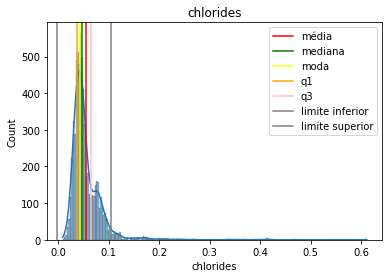

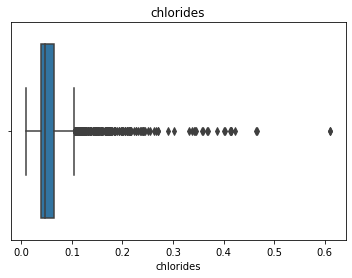

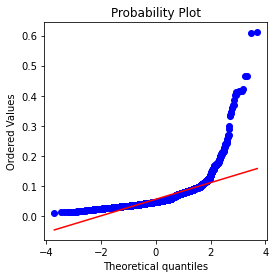

In [76]:
#Verificando dados de 'chlorides'

item = 'chlorides'

sns.histplot(df[item], kde=True)
# plotando média
plt.axvline(x=df[item].mean(), color="red", label="média")

# plotando a mediana
plt.axvline(df[item].median(), color="green", label="mediana")

# Loop para plotar as modas
for i in range(df[item].mode().shape[0]):
    plt.axvline(df[item].mode()[i], color="yellow", label="moda")

plt.axvline(df[item].quantile(0.25), color="orange", label="q1")
plt.axvline(df[item].quantile(0.75), color="pink", label="q3")

IQR = df[item].quantile(0.75) - df[item].quantile(0.25)
plt.axvline(df[item].quantile(0.25)-1.5 * IQR, color="grey", label="limite inferior")
plt.axvline(df[item].quantile(0.75)+1.5 * IQR, color="grey", label="limite superior")

plt.legend()

plt.title(item)
plt.show()
plt.title(item)
sns.boxplot(df[item])
plt.show()
    

fig, ax = plt.subplots(figsize=(4, 4))

stats.probplot(df[item], plot=ax)
plt.show()

In [77]:
df[df['chlorides'] > .36]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red wine
17,8.1,0.560,0.28,1.7,0.368,16.0,56.0,0.99680,3.11,1.28,9.3,5,1
81,7.8,0.430,0.70,1.9,0.464,22.0,67.0,0.99740,3.13,1.28,9.4,5,1
83,7.3,0.670,0.26,1.8,0.401,16.0,51.0,0.99690,3.16,1.14,9.4,5,1
106,7.8,0.410,0.68,1.7,0.467,18.0,69.0,0.99730,3.08,1.31,9.3,5,1
151,9.2,0.520,1.00,3.4,0.610,32.0,69.0,0.99960,2.74,2.00,9.4,4,1
258,7.7,0.410,0.76,1.8,0.611,8.0,45.0,0.99680,3.06,1.26,9.4,5,1
451,8.4,0.370,0.53,1.8,0.413,9.0,26.0,0.99790,3.06,1.06,9.1,6,1
692,8.6,0.490,0.51,2.0,0.422,16.0,62.0,0.99790,3.03,1.17,9.0,5,1
730,9.5,0.550,0.66,2.3,0.387,12.0,37.0,0.99820,3.17,0.67,9.6,5,1
754,7.8,0.480,0.68,1.7,0.415,14.0,32.0,0.99656,3.09,1.06,9.1,6,1


**chlorides**

Optei por remover valores maiores do que 0.36 por ser um outlier que não representar um vinho de qualidade boa ('quality > 6).

Todas as operações de tratamento do DF serão após verificar todos as caracteristicas do vinho o DF completo, ou seja, as condições serão aplicadas depois de verificar os dados da última coluna.

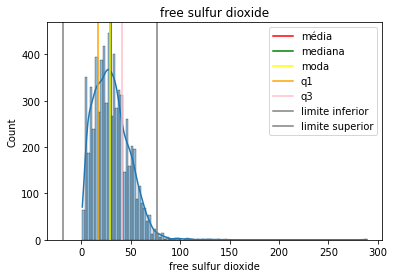

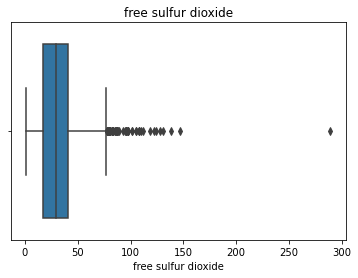

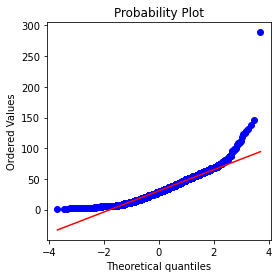

In [78]:
#Verificando dados de 'free sulfur dioxide'

item = 'free sulfur dioxide'

sns.histplot(df[item], kde=True)
# plotando média
plt.axvline(x=df[item].mean(), color="red", label="média")

# plotando a mediana
plt.axvline(df[item].median(), color="green", label="mediana")

# Loop para plotar as modas
for i in range(df[item].mode().shape[0]):
    plt.axvline(df[item].mode()[i], color="yellow", label="moda")

plt.axvline(df[item].quantile(0.25), color="orange", label="q1")
plt.axvline(df[item].quantile(0.75), color="pink", label="q3")

IQR = df[item].quantile(0.75) - df[item].quantile(0.25)
plt.axvline(df[item].quantile(0.25)-1.5 * IQR, color="grey", label="limite inferior")
plt.axvline(df[item].quantile(0.75)+1.5 * IQR, color="grey", label="limite superior")

plt.legend()

plt.title(item)
plt.show()
plt.title(item)
sns.boxplot(df[item])
plt.show()
    

fig, ax = plt.subplots(figsize=(4, 4))

stats.probplot(df[item], plot=ax)
plt.show()

In [79]:
df[df['free sulfur dioxide'] > 160]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red wine
6344,6.1,0.26,0.25,2.9,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,0


**'free sulfur dioxide'**

Optei por remover valores maiores do que 160 por ser um outlier isolado que não representar um vinho de qualidade boa ('quality > 6).

Todas as operações de tratamento do DF serão após verificar todos as caracteristicas do vinho o DF completo, ou seja, as condições serão aplicadas depois de verificar os dados da última coluna.

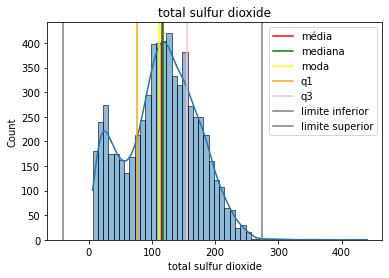

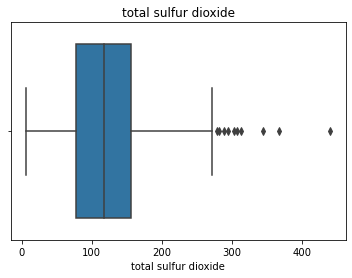

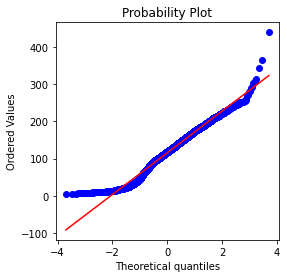

In [80]:
#Verificando dados de 'total sulfur dioxide'

item = 'total sulfur dioxide'

sns.histplot(df[item], kde=True)
# plotando média
plt.axvline(x=df[item].mean(), color="red", label="média")

# plotando a mediana
plt.axvline(df[item].median(), color="green", label="mediana")

# Loop para plotar as modas
for i in range(df[item].mode().shape[0]):
    plt.axvline(df[item].mode()[i], color="yellow", label="moda")

plt.axvline(df[item].quantile(0.25), color="orange", label="q1")
plt.axvline(df[item].quantile(0.75), color="pink", label="q3")

IQR = df[item].quantile(0.75) - df[item].quantile(0.25)
plt.axvline(df[item].quantile(0.25)-1.5 * IQR, color="grey", label="limite inferior")
plt.axvline(df[item].quantile(0.75)+1.5 * IQR, color="grey", label="limite superior")

plt.legend()

plt.title(item)
plt.show()
plt.title(item)
sns.boxplot(df[item])
plt.show()
    

fig, ax = plt.subplots(figsize=(4, 4))

stats.probplot(df[item], plot=ax)
plt.show()

In [81]:
df[df['total sulfur dioxide'] > 340]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red wine
3016,8.6,0.55,0.35,15.55,0.057,35.5,366.5,1.00010,3.04,0.63,11.0,3,0
3726,9.1,0.33,0.38,1.70,0.062,50.5,344.0,0.99580,3.10,0.70,9.5,5,0
6344,6.1,0.26,0.25,2.90,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,0


**'total sulfur dioxide'**

Optei por remover valores maiores do que 340 por ser um outlier isolado que não representar um vinho de qualidade boa ('quality > 6).

Todas as operações de tratamento do DF serão após verificar todos as caracteristicas do vinho o DF completo, ou seja, as condições serão aplicadas depois de verificar os dados da última coluna.

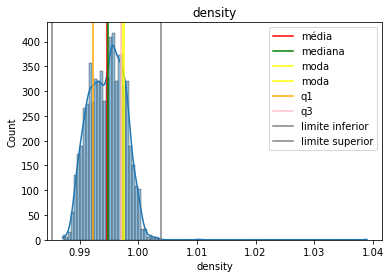

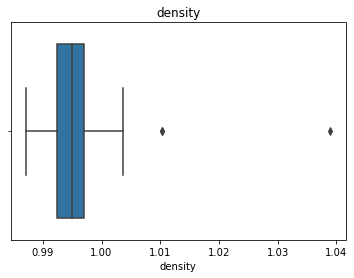

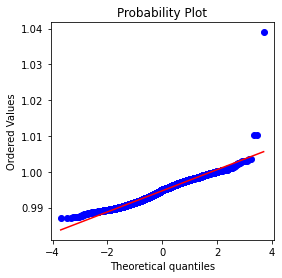

In [82]:
#Verificando dados de 'density'

item = 'density'

sns.histplot(df[item], kde=True)
# plotando média
plt.axvline(x=df[item].mean(), color="red", label="média")

# plotando a mediana
plt.axvline(df[item].median(), color="green", label="mediana")

# Loop para plotar as modas
for i in range(df[item].mode().shape[0]):
    plt.axvline(df[item].mode()[i], color="yellow", label="moda")

plt.axvline(df[item].quantile(0.25), color="orange", label="q1")
plt.axvline(df[item].quantile(0.75), color="pink", label="q3")

IQR = df[item].quantile(0.75) - df[item].quantile(0.25)
plt.axvline(df[item].quantile(0.25)-1.5 * IQR, color="grey", label="limite inferior")
plt.axvline(df[item].quantile(0.75)+1.5 * IQR, color="grey", label="limite superior")

plt.legend()

plt.title(item)
plt.show()
plt.title(item)
sns.boxplot(df[item])
plt.show()
    

fig, ax = plt.subplots(figsize=(4, 4))

stats.probplot(df[item], plot=ax)
plt.show()

In [83]:
df[df['density'] > 1.005]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red wine
3252,7.9,0.330,0.28,31.6,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6,0
3262,7.9,0.330,0.28,31.6,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6,0
4380,7.8,0.965,0.60,65.8,0.074,8.0,160.0,1.03898,3.39,0.69,11.7,6,0


**'density'**

Optei por remover valores maiores do que 1.005 por ser um outlier que não representar um vinho de qualidade boa ('quality > 6) e que estão fora da tendência linear da distribuição de probabilidades.

Todas as operações de tratamento do DF serão após verificar todos as caracteristicas do vinho o DF completo, ou seja, as condições serão aplicadas depois de verificar os dados da última coluna.

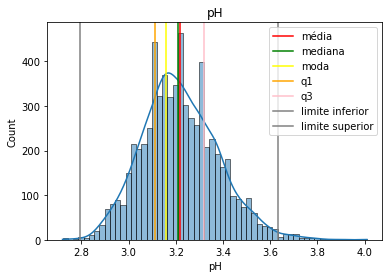

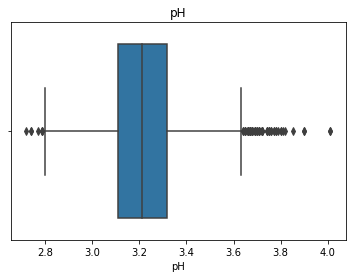

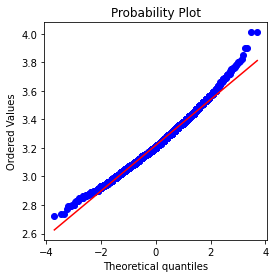

In [84]:
#Verificando dados de 'pH'

item = 'pH'

sns.histplot(df[item], kde=True)
# plotando média
plt.axvline(x=df[item].mean(), color="red", label="média")

# plotando a mediana
plt.axvline(df[item].median(), color="green", label="mediana")

# Loop para plotar as modas
for i in range(df[item].mode().shape[0]):
    plt.axvline(df[item].mode()[i], color="yellow", label="moda")

plt.axvline(df[item].quantile(0.25), color="orange", label="q1")
plt.axvline(df[item].quantile(0.75), color="pink", label="q3")

IQR = df[item].quantile(0.75) - df[item].quantile(0.25)
plt.axvline(df[item].quantile(0.25)-1.5 * IQR, color="grey", label="limite inferior")
plt.axvline(df[item].quantile(0.75)+1.5 * IQR, color="grey", label="limite superior")

plt.legend()

plt.title(item)
plt.show()
plt.title(item)
sns.boxplot(df[item])
plt.show()
    

fig, ax = plt.subplots(figsize=(4, 4))

stats.probplot(df[item], plot=ax)
plt.show()

In [85]:
df[df['pH'] > 3.9]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red wine
1316,5.4,0.74,0.0,1.2,0.041,16.0,46.0,0.99258,4.01,0.59,12.5,6,1
1321,5.0,0.74,0.0,1.2,0.041,16.0,46.0,0.99258,4.01,0.59,12.5,6,1


In [86]:
df[df['pH'] < 2.78]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red wine
151,9.2,0.52,1.00,3.4,0.610,32.0,69.0,0.9996,2.74,2.00,9.4,4,1
2813,9.7,0.24,0.45,1.2,0.033,11.0,59.0,0.9926,2.74,0.47,10.8,6,0
3499,10.0,0.23,0.27,14.1,0.033,45.0,166.0,0.9988,2.72,0.43,9.7,6,0
3761,9.9,0.49,0.23,2.4,0.087,19.0,115.0,0.9948,2.77,0.44,9.4,6,0


**'density'**

Optei por remover valores maiores do que 3.9 por ser um outlier que não representar um vinho de qualidade boa ('quality > 6) e que estão fora da tendência linear da distribuição de probabilidades.

Todas as operações de tratamento do DF serão após verificar todos as caracteristicas do vinho o DF completo, ou seja, as condições serão aplicadas depois de verificar os dados da última coluna.

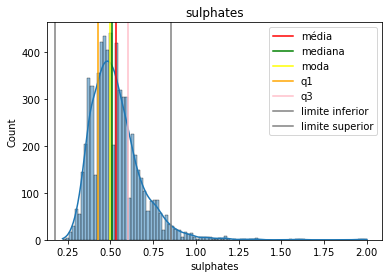

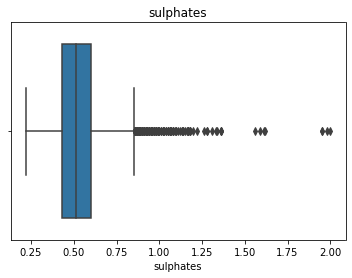

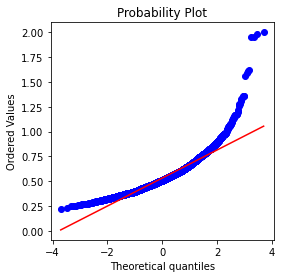

In [87]:
#Verificando dados de 'sulphates'

item = 'sulphates'

sns.histplot(df[item], kde=True)
# plotando média
plt.axvline(x=df[item].mean(), color="red", label="média")

# plotando a mediana
plt.axvline(df[item].median(), color="green", label="mediana")

# Loop para plotar as modas
for i in range(df[item].mode().shape[0]):
    plt.axvline(df[item].mode()[i], color="yellow", label="moda")

plt.axvline(df[item].quantile(0.25), color="orange", label="q1")
plt.axvline(df[item].quantile(0.75), color="pink", label="q3")

IQR = df[item].quantile(0.75) - df[item].quantile(0.25)
plt.axvline(df[item].quantile(0.25)-1.5 * IQR, color="grey", label="limite inferior")
plt.axvline(df[item].quantile(0.75)+1.5 * IQR, color="grey", label="limite superior")

plt.legend()

plt.title(item)
plt.show()
plt.title(item)
sns.boxplot(df[item])
plt.show()
    

fig, ax = plt.subplots(figsize=(4, 4))

stats.probplot(df[item], plot=ax)
plt.show()

In [88]:
df[df['sulphates'] > 1.75]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red wine
86,8.6,0.49,0.28,1.9,0.11,20.0,136.0,0.9972,2.93,1.95,9.9,6,1
91,8.6,0.49,0.28,1.9,0.11,20.0,136.0,0.9972,2.93,1.95,9.9,6,1
92,8.6,0.49,0.29,2.0,0.11,19.0,133.0,0.9972,2.93,1.98,9.8,5,1
151,9.2,0.52,1.00,3.4,0.61,32.0,69.0,0.9996,2.74,2.00,9.4,4,1


**'sulphates'**

Optei por remover valores maiores do que 1.75 por ser um outlier que não representar um vinho de qualidade boa ('quality > 6) e que estão fora da tendência da parabola da distribuição de probabilidades.

Todas as operações de tratamento do DF serão após verificar todos as caracteristicas do vinho o DF completo, ou seja, as condições serão aplicadas depois de verificar os dados da última coluna.

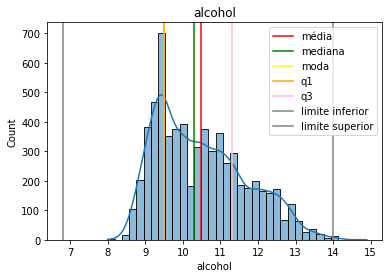

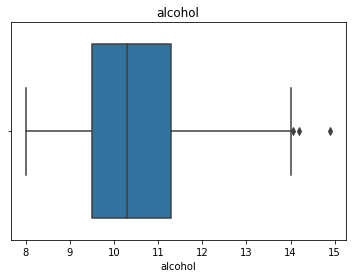

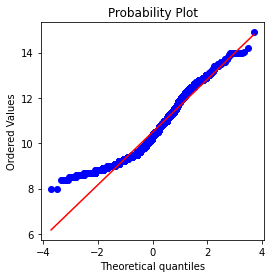

In [89]:
#Verificando dados de 'alcohol'

item = 'alcohol'

sns.histplot(df[item], kde=True)
# plotando média
plt.axvline(x=df[item].mean(), color="red", label="média")

# plotando a mediana
plt.axvline(df[item].median(), color="green", label="mediana")

# Loop para plotar as modas
for i in range(df[item].mode().shape[0]):
    plt.axvline(df[item].mode()[i], color="yellow", label="moda")

plt.axvline(df[item].quantile(0.25), color="orange", label="q1")
plt.axvline(df[item].quantile(0.75), color="pink", label="q3")

IQR = df[item].quantile(0.75) - df[item].quantile(0.25)
plt.axvline(df[item].quantile(0.25)-1.5 * IQR, color="grey", label="limite inferior")
plt.axvline(df[item].quantile(0.75)+1.5 * IQR, color="grey", label="limite superior")

plt.legend()

plt.title(item)
plt.show()
plt.title(item)
sns.boxplot(df[item])
plt.show()
    

fig, ax = plt.subplots(figsize=(4, 4))

stats.probplot(df[item], plot=ax)
plt.show()

In [90]:
df[df['alcohol'] > 14.5]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red wine
652,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.9976,2.98,0.84,14.9,5,1


**'alcohol'**

Optei por remover valores maiores do que 14.5 por ser um outlier isolado que não representa um vinho de qualidade boa ('quality > 6) e que estão fora da tendência curva da distribuição de probabilidades.

Todas as operações de tratamento do DF serão após verificar todos as caracteristicas do vinho o DF completo, ou seja, as condições serão aplicadas depois de verificar os dados da última coluna.

**Realizando o tratamento dos dados**

In [91]:
#Eliminando outlier de 'volatile acidity'
df.drop(df[df['volatile acidity'] > 1.4].index, inplace = True)

#Eliminando outlier de 'citric acid'
df.drop(df[df['citric acid'] > 1.2].index, inplace = True)

#Eliminando outlier de 'residual sugar'
df.drop(df[df['residual sugar'] > 30].index, inplace = True)

#Eliminando outlier de 'chlorides'
df.drop(df[df['chlorides'] > 0.36].index, inplace = True)

#Eliminando outlier de 'free sulfur dioxide'
df.drop(df[df['free sulfur dioxide'] > 160].index, inplace = True)

#Eliminando outlier de 'total sulfur dioxide'
df.drop(df[df['total sulfur dioxide'] > 340].index, inplace = True)

#Eliminando outlier de 'density'
df.drop(df[df['density'] > 1.005].index, inplace = True)

#Eliminando outlier de 'pH'
df.drop(df[df['pH'] > 3.9].index, inplace = True)

#Eliminando outlier de 'sulphates'
df.drop(df[df['sulphates'] > 1.75].index, inplace = True)

#Eliminando outlier de 'alcohol'
df.drop(df[df['alcohol'] > 14.5].index, inplace = True)

In [92]:
# Verificando correlações
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red wine
fixed acidity,1.000000,0.219008,0.323322,-0.115646,0.327479,-0.285670,-0.332422,0.466339,-0.247798,0.300018,-0.096710,-0.074015,0.486751
volatile acidity,0.219008,1.000000,-0.389172,-0.205576,0.412674,-0.355362,-0.416379,0.268643,0.264430,0.221492,-0.036782,-0.262747,0.653696
citric acid,0.323322,-0.389172,1.000000,0.147850,-0.017623,0.140620,0.201339,0.093769,-0.326846,0.034861,-0.010610,0.090361,-0.197414
residual sugar,-0.115646,-0.205576,0.147850,1.000000,-0.133944,0.419403,0.502899,0.537763,-0.276453,-0.188321,-0.369112,-0.039589,-0.350883
chlorides,0.327479,0.412674,-0.017623,-0.133944,1.000000,-0.209798,-0.301643,0.414495,0.094152,0.328106,-0.276240,-0.212600,0.558907
free sulfur dioxide,-0.285670,-0.355362,0.140620,0.419403,-0.209798,1.000000,0.722801,0.032503,-0.153231,-0.192391,-0.185374,0.062173,-0.476482
total sulfur dioxide,-0.332422,-0.416379,0.201339,0.502899,-0.301643,0.722801,1.000000,0.031548,-0.242138,-0.283807,-0.271079,-0.039381,-0.702595
density,0.466339,0.268643,0.093769,0.537763,0.414495,0.032503,0.031548,1.000000,0.015016,0.264555,-0.702886,-0.312196,0.400107
pH,-0.247798,0.264430,-0.326846,-0.276453,0.094152,-0.153231,-0.242138,0.015016,1.000000,0.228647,0.117419,0.017472,0.337044
sulphates,0.300018,0.221492,0.034861,-0.188321,0.328106,-0.192391,-0.283807,0.264555,0.228647,1.000000,0.009873,0.053323,0.487771


<AxesSubplot:>

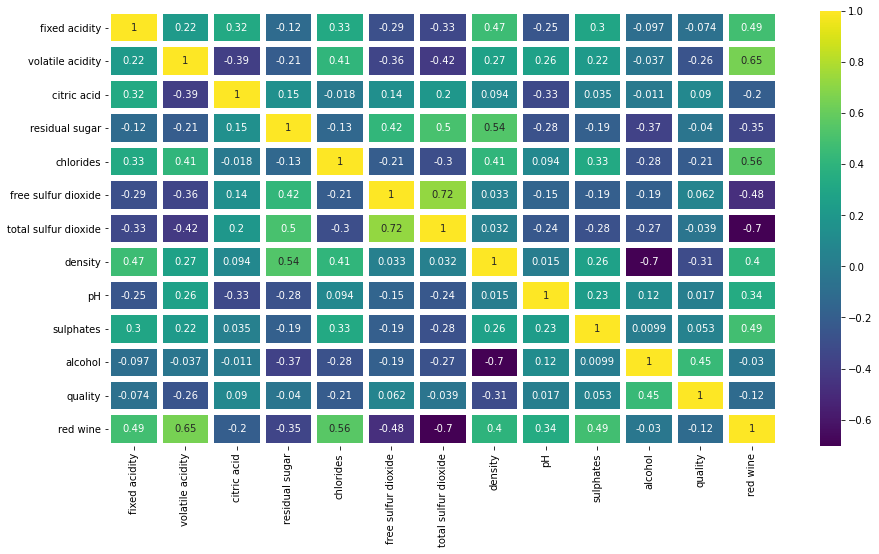

In [93]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot=True, cmap='viridis', linewidths=5)

As correlações das propriedades fisicoquimicas individualmnte de cada vinho não tem muita relaçãoo com a qualidade do vinho, por isso vou tentar correlacionar mais propriedades para determinar uma correlação com a qualidade.

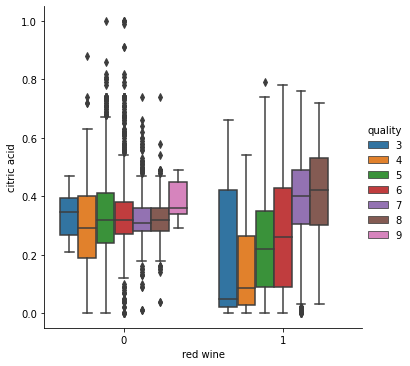

In [94]:
sns.catplot(x="red wine", y="citric acid", kind="box", hue="quality", data=df)

Não existe vinho vermelho com nota 9.

In [95]:
df[df['quality'] > 8]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red wine
2373,9.1,0.27,0.45,10.6,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,9,0
2419,6.6,0.36,0.29,1.6,0.021,24.0,85.0,0.98965,3.41,0.61,12.4,9,0
2426,7.4,0.24,0.36,2.0,0.031,27.0,139.0,0.99055,3.28,0.48,12.5,9,0
2475,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9,0
3204,7.1,0.26,0.49,2.2,0.032,31.0,113.0,0.99030,3.37,0.42,12.9,9,0


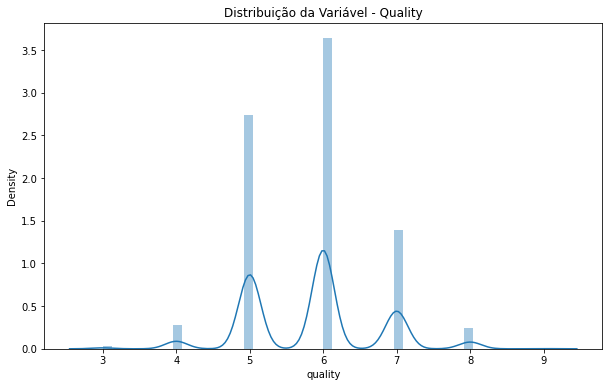

In [96]:
# Dimensiona a figura do gráfico
plt.figure(figsize=(10,6))

# Plot da distribuição da variavel resposta
sns.distplot(df["quality"], kde=True)

# Cria um titulo
plt.title('Distribuição da Variável - Quality')

# Mostra o gráfico
plt.show()

# **Etapa 2- Regressão Linear**

**Geração do moodelo**

In [97]:
# Speração dos dados entre variáveis e resposta
X = df.drop('quality',axis=1)
y = df['quality']

In [98]:
# Separação em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state = 51)

In [99]:
# Define como será feito a normalização
scaler = StandardScaler()

In [100]:
# Normalizando os dados de treino e teste para não haver erro de escala.
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [101]:
# Definindo o modelo de Regressão linear
linreg = LinearRegression()

In [102]:
# Ajustando o modelo
linreg.fit(X_train_std, y_train)

LinearRegression()

In [103]:
# Fazendo as predições
y_pred = linreg.predict(X_test_std)

In [104]:
# Fazendo as predições
y_pred = linreg.predict(X_test_std)

In [105]:
# Visualizando as predições
y_pred

array([5.81056067, 5.11038942, 5.59342479, ..., 6.65032197, 5.7262264 ,
       6.05098166])

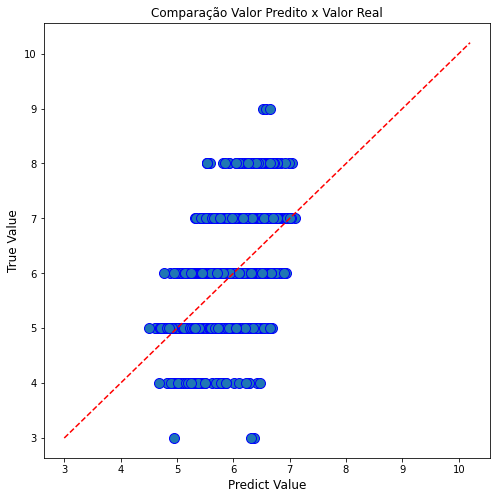

In [106]:
# Configurações do Gráfico comparativo
fig = plt.figure(figsize=(8,8))
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')
plt.title('Comparação Valor Predito x Valor Real', fontsize=12)
plt.ylabel("True Value", fontsize=12)
plt.xlabel("Predict Value", fontsize=12)

# Mostra a reta diagonal, que representa a predição perfeita
xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl

# Plot do gráfico comparando ambos o teste e as predições
plt.plot(xl, yl, 'r--')

# Mostra o gráfico
plt.show()

In [107]:
# Print das Métricas
print('Métricas para a Previsão:')
print('Erro Absoluto Médio:   ', np.round(mean_absolute_error(y_test, y_pred), 3))
print('Erro Quadrãtico Médio: ', np.round(mean_squared_error(y_test, y_pred), 3))
print('R^2:                   ', np.round(r2_score(y_test, y_pred), 3))

Métricas para a Previsão:
Erro Absoluto Médio:    0.552
Erro Quadrãtico Médio:  0.501
R^2:                    0.315


In [108]:
# Determinando o Feature Importance
coefs = linreg.coef_

# Criando as listas
list_columns = X_train.columns
list_feature = []
list_score = []

# Atrela cada feature a um score
for i, v in enumerate(coefs):
    list_feature.append(list_columns[i])
    list_score.append(v)

# Monta um dicionário
dictionary = {'Features': list_feature,
              'Scores': list_score}

# converte o dicionário em dataframe
df_features = pd.DataFrame(dictionary)
df_features = df_features.sort_values(by=['Scores'], ascending=False)
df_features.reset_index(inplace=True, drop=True)

# Plot das features
df_features

,Features,Scores
0,residual sugar,0.334402
1,alcohol,0.232725
2,red wine,0.183942
3,fixed acidity,0.136682
4,sulphates,0.109908
5,pH,0.098757
6,free sulfur dioxide,0.092459
7,citric acid,-0.000309
8,chlorides,-0.019237
9,total sulfur dioxide,-0.073460


**A maior correlação negativa é a densidade e a maior positiva é o açucar residual.**

# **Etapa 2- Regressão logística**

In [175]:
#Classificando os vinhos (1 é o vinho bom e 0 o vinho ruim)
df.loc[df['quality'] >= 6, 'wine_quality'] = 1
df.loc[df['quality'] < 6, 'wine_quality'] = 0

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6466 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6466 non-null   float64
 1   volatile acidity      6466 non-null   float64
 2   citric acid           6466 non-null   float64
 3   residual sugar        6466 non-null   float64
 4   chlorides             6466 non-null   float64
 5   free sulfur dioxide   6466 non-null   float64
 6   total sulfur dioxide  6466 non-null   float64
 7   density               6466 non-null   float64
 8   pH                    6466 non-null   float64
 9   sulphates             6466 non-null   float64
 10  alcohol               6466 non-null   float64
 11  quality               6466 non-null   int64  
 12  red wine              6466 non-null   int64  
 13  wine_quality          6466 non-null   float64
dtypes: float64(12), int64(2)
memory usage: 1015.8 KB


In [177]:
#Armazenando os valores reais de classificação
y = df['wine_quality']

In [178]:
y.value_counts()

1.0    4101
0.0    2365
Name: wine_quality, dtype: int64

In [179]:
#Definindo X
X = df.drop(["quality", "wine_quality"], axis=1)

In [180]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,red wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,0


In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [182]:
# Define como será feito a normalização
scaler = StandardScaler()

In [183]:
# Normalizando os dados de treino e teste
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

**MODELO**

In [184]:
# Instanciando o modelo
model = LogisticRegression()

In [185]:
# Fit do Modelo, ajustar o modelo
model.fit(X_train, y_train) # o modelo está treinado

LogisticRegression()

In [186]:
# Predições para a base de teste
y_pred = model.predict(X_test)
y_proba =  model.predict_proba(X_test)

In [187]:
y_pred

array([1., 1., 0., ..., 1., 0., 1.])

In [188]:
y_proba

array([[0.46872067, 0.53127933],
       [0.2048207 , 0.7951793 ],
       [0.5395541 , 0.4604459 ],
       ...,
       [0.24202038, 0.75797962],
       [0.5110262 , 0.4889738 ],
       [0.07104685, 0.92895315]])

**AVALIAÇÃO DO MODELO DE REGRESSÃO LOGÍSTICA**

In [189]:
# Classification Report dos Resultados
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.66      0.53      0.58       714
         1.0       0.75      0.84      0.79      1226

    accuracy                           0.72      1940
   macro avg       0.70      0.68      0.69      1940
weighted avg       0.72      0.72      0.72      1940



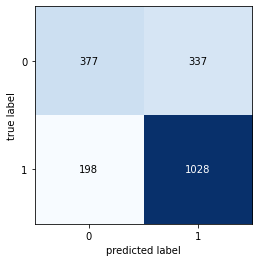

In [190]:
# Define a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Cria o plot da matriz de confusão
plot_confusion_matrix(conf_mat=cm)

# Mostra o gráfico
plt.show()

## **Com a regessão logística temos uma classificação com precisão e acuracia de mais de 70% e principalmente acertando a classificação dos vinhos de boa qualidade que pode ser observado na matriz de confusão.**